# Source

https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset

# Import statements

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data exploring

In [10]:
df = pd.read_csv('Billionaires_Statistics_Dataset.csv')
df = pd.DataFrame().assign(Rank=df['rank'], PersonName=df['personName'], FinalWorth=df['finalWorth'], Country=df['country'], GDPperCapita=df["gdp_country"]/df["population_country"], TotalTaxRate=df['total_tax_rate_country'], CPI=df['cpi_country'])
df

,Rank,PersonName,FinalWorth,Country,GDPperCapita,TotalTaxRate,CPI
0,1,Bernard Arnault & family,211000,France,40493.928572,60.7,110.05
1,2,Elon Musk,180000,United States,65280.682241,36.6,117.24
2,3,Jeff Bezos,114000,United States,65280.682241,36.6,117.24
3,4,Larry Ellison,107000,United States,65280.682241,36.6,117.24
4,5,Warren Buffett,106000,United States,65280.682241,36.6,117.24
...,...,...,...,...,...,...,...
2635,2540,Yu Rong,1000,China,14244.677921,59.2,125.08
2636,2540,"Richard Yuengling, Jr.",1000,United States,65280.682241,36.6,117.24
2637,2540,Zhang Gongyun,1000,China,14244.677921,59.2,125.08
2638,2540,Zhang Guiping & family,1000,China,14244.677921,59.2,125.08


We do not need so many attributes so we make a new data frame.

# Data cleaning

In [15]:
df.isna().sum()

Rank              0
PersonName        0
FinalWorth        0
Country          38
GDPperCapita    164
TotalTaxRate    182
CPI             184
dtype: int64

We see that we've got some NaN values, so we need to get rid of them.


In [18]:
data_train_clean = df.dropna()
data_train_clean

,Rank,PersonName,FinalWorth,Country,GDPperCapita,TotalTaxRate,CPI
0,1,Bernard Arnault & family,211000,France,40493.928572,60.7,110.05
1,2,Elon Musk,180000,United States,65280.682241,36.6,117.24
2,3,Jeff Bezos,114000,United States,65280.682241,36.6,117.24
3,4,Larry Ellison,107000,United States,65280.682241,36.6,117.24
4,5,Warren Buffett,106000,United States,65280.682241,36.6,117.24
...,...,...,...,...,...,...,...
2635,2540,Yu Rong,1000,China,14244.677921,59.2,125.08
2636,2540,"Richard Yuengling, Jr.",1000,United States,65280.682241,36.6,117.24
2637,2540,Zhang Gongyun,1000,China,14244.677921,59.2,125.08
2638,2540,Zhang Guiping & family,1000,China,14244.677921,59.2,125.08


In [20]:
data_train_clean.sort_values('Rank', inplace=True)
data_train_clean.duplicated().sum()

<ipython-input-20-de559454050e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_clean.sort_values('Rank', inplace=True)


0

Fortunately, there is no duplcates in our file!

# Finding target value

What we need to do it to find a target value that will be an amount of billionaires in particular country.



But firstly we will make a new data frame that will contain all of economical indicators of countries.

In [21]:
economical_indicators = data_train_clean.drop_duplicates(subset=['Country']).sort_values('Country')
economical_indicators.head()

,Rank,PersonName,FinalWorth,Country,GDPperCapita,TotalTaxRate,CPI
604,591,Issad Rebrab & family,4600,Algeria,3948.343279,66.1,151.36
554,552,Marcos Galperin,4900,Argentina,10006.148974,106.3,232.75
2375,2259,Ruben Vardanyan & family,1200,Armenia,4622.733493,22.6,129.18
51,52,Gina Rinehart,27000,Australia,54049.828812,47.4,119.80
36,37,Mark Mateschitz,34700,Austria,50277.275087,51.4,118.06


In [22]:
target_value = data_train_clean[['PersonName', 'Country']].groupby('Country').count()
target_value

,PersonName
Country,
Algeria,1
Argentina,4
Armenia,1
Australia,43
Austria,11
...,...
United Arab Emirates,17
United Kingdom,82
United States,754


In [23]:
df_country = pd.DataFrame().assign(Country=economical_indicators.Country, GDPperCapita=economical_indicators.GDPperCapita, CPI=economical_indicators.CPI, TotalTaxRate=economical_indicators.TotalTaxRate, AmountOfBillionaires=target_value.values)

In [ ]:
# df_country.to_csv("/content/drive/MyDrive/Colab Notebooks/STUDIA/Billionaires_Country_Data.csv")

# Data splitting

Now we need to split our data for training and testing sets for future regression and classification.

In [26]:
data_train, data_test= train_test_split(df_country, test_size=0.3, random_state=42)

# Visualisation

In [27]:
scatter = px.scatter(data_train,
                     x='GDPperCapita',
                     y='AmountOfBillionaires',
                     title='GDP per Capita vs. Billionaires Amount',
                     size='AmountOfBillionaires',
                     hover_name=data_train.Country,
                     color='AmountOfBillionaires')

scatter.update_layout(xaxis_title="GDPperCapita",
                      yaxis_title="AmountOfBillionaires",
                      yaxis=dict(type='log'))

scatter.show()

In [28]:
scatter = px.scatter(data_train,
                     x='TotalTaxRate',
                     y='CPI',
                     title='TotalTaxRate and CPI vs. Billionaires Amount',
                     size='AmountOfBillionaires',
                     hover_name=data_train.Country,
                     color='GDPperCapita')

scatter.update_layout(xaxis_title="TotalTaxRate",
                      yaxis_title="CPI",
                      yaxis=dict(type='log'))

scatter.show()

In [29]:
fig = px.bar(data_train, x='AmountOfBillionaires', y='Country', orientation='h')
fig.show()

<ipython-input-30-a9fca8dca026>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

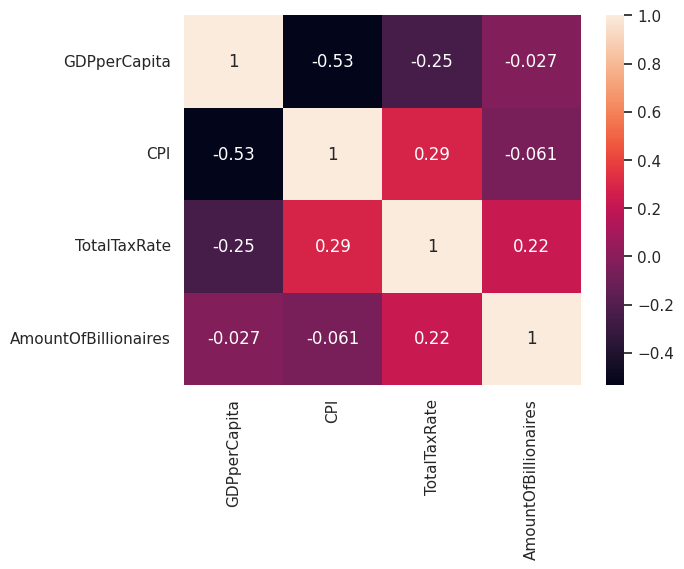

In [30]:
corr = data_train.corr()
sns.set(font_scale=1)
sns.heatmap(corr, annot=True)

We see that our plots are very unreadable so we need to scale our data.